In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import utils
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [4]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [5]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X,_ = Preprocessing.scale_data(X)
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

#áp dụng smote
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm, y_train_sm = Preprocessing.apply_smote(X_train_sm, y_train_sm)

In [7]:
# Preprocessing.plot_heatmap(X_train_sm[list['Feature']], y_train_sm,'Attack_type')

In [8]:
# Preprocessing.plot_heatmap(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train,'Attack_type')

Train với dữ liệu chưa giảm chiều

In [9]:
# x2 = X_train[list['Feature']].drop(dropped_columns, axis=1)

In [10]:
# print(len(X_train.columns))

In [11]:
model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
y_pred = model_LinearSVC.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1500
           1       0.99      0.77      0.87       128
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.67      0.18      0.29        22
           5       0.67      0.40      0.50         5
           6       1.00      0.99      0.99       397
           7       1.00      1.00      1.00       220
           8       0.85      0.97      0.91       429
           9       0.99      0.99      0.99       386
          10       0.95      0.92      0.94      1686
          11       0.84      0.59      0.70        83

    accuracy                           0.99     24624
   macro avg       0.90      0.81      0.84     24624
weighted avg       0.99      0.99      0.99     24624

Confusion Matrix:
 [[ 1406     1     0     2     2     1     0     0    45     3    39     1]
 [    4    99  

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
y_pred = model_xgboost.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1594
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      1.00      0.99       485
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1619
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.96      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1571     0     0     0     0     1     0     0     3     2    15     2]
 [    0   100  

In [14]:
model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_sm)
y_pred = model_logistic_regression.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1440
           1       0.99      0.73      0.84       135
           2       1.00      1.00      1.00     18897
           3       1.00      0.99      1.00       877
           4       0.83      0.09      0.16        56
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.87      0.84      0.85       503
           9       0.99      1.00      1.00       381
          10       0.94      0.94      0.94      1629
          11       0.91      0.60      0.73        88

    accuracy                           0.98     24624
   macro avg       0.92      0.79      0.83     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1354     0     0     1     1     1     0     0    36     2    43     2]
 [   11    99  

In [15]:
model_knn = model.model_knn(X_train_sm, y_train_sm)
y_pred = model_knn.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1585
           1       0.97      0.98      0.97        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.45      0.59        11
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       394
           7       1.00      1.00      1.00       220
           8       0.98      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.98      0.98      0.98      1622
          11       0.91      0.98      0.95        54

    accuracy                           1.00     24624
   macro avg       0.94      0.90      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1547     2     0     1     0     1     0     0     4     2    26     2]
 [    1    97  

In [16]:
model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.96      0.98      0.97        98
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       873
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1618
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     1     0     0     0     0     4     2    17     2]
 [    0    96  

Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


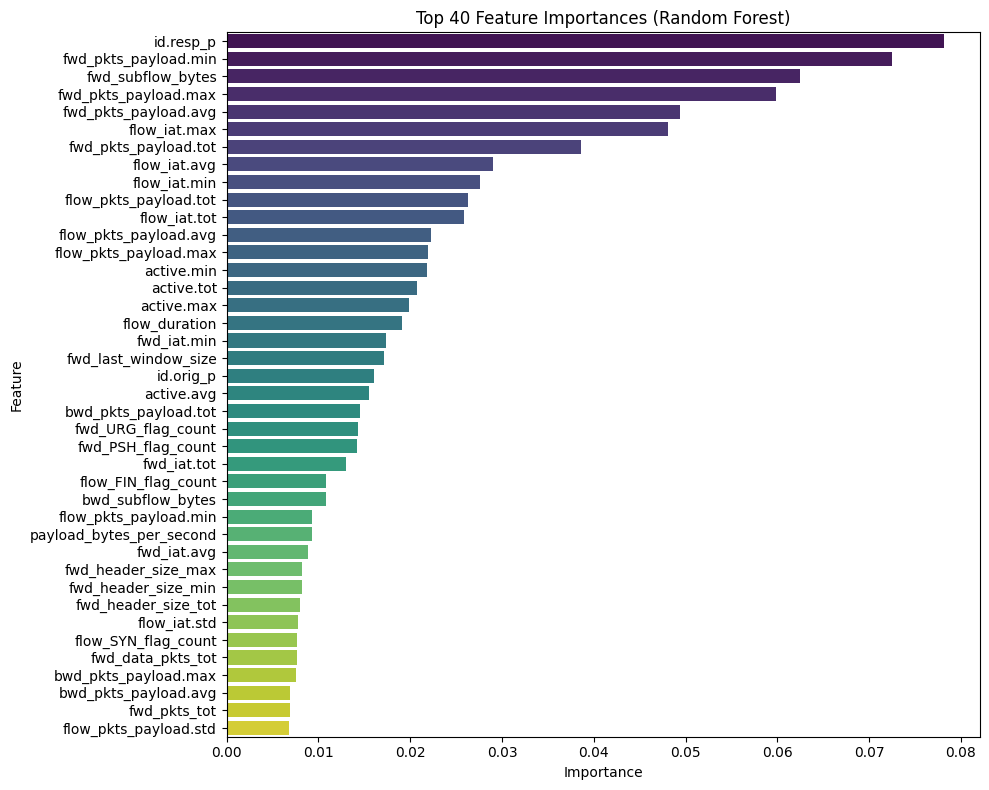

In [ ]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [18]:
X_train_sm = X_train_sm[list['Feature']]

In [19]:
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['flow_iat.avg', 'flow_iat.max', 'idle.max', 'fwd_pkts_payload.avg', 'flow_iat.std', 'fwd_init_window_size', 'bwd_header_size_tot', 'flow_pkts_payload.std', 'flow_pkts_payload.tot', 'bwd_pkts_payload.std', 'active.avg', 'bwd_pkts_payload.tot', 'bwd_subflow_bytes', 'bwd_bulk_bytes', 'bwd_subflow_pkts', 'flow_SYN_flag_count', 'fwd_pkts_payload.std', 'bwd_bulk_packets', 'flow_ACK_flag_count', 'fwd_bulk_packets', 'bwd_init_window_size', 'bwd_header_size_max', 'active.max', 'bwd_pkts_per_sec', 'flow_pkts_payload.max', 'idle.min', 'bwd_iat.avg', 'fwd_data_pkts_tot', 'flow_ECE_flag_count', 'fwd_iat.tot', 'bwd_data_pkts_tot', 'fwd_iat.std', 'fwd_pkts_payload.tot', 'proto_udp', 'active.std', 'payload_bytes_per_second', 'idle.avg', 'idle.tot', 'bwd_pkts_payload.avg', 'fwd_header_size_max', 'flow_iat.tot', 'flow_pkts_per_sec', 'fwd_header_size_tot', 'bwd_iat.std']


In [20]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

In [21]:
model_random_forest = model.model_random_forest(X_train_sm_dr, y_train_sm_dr)
y_pred = model_random_forest.predict(X_test_sm_dr)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.99      1.00      0.99        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1619
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1568     0     0     0     0     1     0     0     4     2    16     1]
 [    0    99  

In [ ]:
model_mlp = model.model_mlp(X_train_sm_dr, y_train_sm, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, output_size=12, epochs=10000)


TypeError: model_mlp() missing 1 required positional argument: 'hidden_size3'

In [ ]:
y_pred = model.predict_mlp(model_mlp, X_test_sm_dr)
utils.report(y_pred, y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79      1716
           1       0.79      0.87      0.82       375
           2       1.00      1.00      1.00     18945
           3       1.00      1.00      1.00       883
           4       0.78      0.95      0.86       316
           5       0.91      0.96      0.93       378
           6       0.85      0.74      0.79       502
           7       0.99      0.94      0.97       400
           8       0.64      0.83      0.73       389
           9       1.00      1.00      1.00       404
          10       0.84      0.80      0.82      1685
          11       0.62      0.92      0.75       260

    accuracy                           0.96     26253
   macro avg       0.85      0.90      0.87     26253
weighted avg       0.96      0.96      0.96     26253

Confusion Matrix:
 [[ 1293     2     0     1    67    23     0     0    28     0   242    60]
 [   42   325  

Train mô hỉnh tinh chỉnh.

In [ ]:
# model_svc_k_linear = model.SVM(X_train, y_train , C=1.0, kernel='linear', gamma='scale')
# model_svc_k_linear_predict = model_svc_k_linear.predict(X_test)
# utils.report(model_svc_k_linear_predict, y_test)

In [ ]:
# model_svc_k_rbf = model.SVM(X_train, y_train,C=1.0, kernel='rbf', gamma='scale')
# model_svc_k_rbf_predict = model_svc_k_rbf.predict(X_test)
# utils.report(model_svc_k_linear_predict, y_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# # 👉 4. Khởi tạo và huấn luyện mô hình Random Forest
# rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)

# # 👉 5. Dự đoán
# y_pred = rf_model.predict(X_test)

# # 👉 6. Đánh giá
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print(y_test.value_counts())
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# # kiểm tra hiệu suất
# from sklearn.svm import SVC
# svm = SVC(kernel='linear')
# svm.fit(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train)

# X_test_selected_reduced = X_test.drop(columns=X_train[list['Feature']].drop(dropped_columns, axis=1).columns, errors='ignore')
# accuracy = svm.score(X_test_selected_reduced, y_test)
# print(f"Accuracy on test set after feature reduction: {accuracy:.4f}")

In [ ]:
# #kiểm tra nhãn dạng categorycal
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# print(f"Các cột categorical: {list(categorical_columns)}")
# print(f"Số lượng cột categorical: {len(categorical_columns)}")
# for col in categorical_columns:
#     print(f"\nCột '{col}':")
#     print(f"Giá trị duy nhất: {data[col].unique()}")
#     print(f"Số lượng giá trị duy nhất: {data[col].nunique()}")
# #kiểm tra số lượng '-'.
# print(data['service'].value_counts()) # có ther

In [ ]:
#Kiểm tra giá trị null nào không?

In [ ]:
#drop cột service
# data.drop(columns=['service'], inplace=True)

In [ ]:
# # one-hot encoding cho cột categorical
# from sklearn.preprocessing import OneHotEncoder

# # 2. Tạo ví dụ DataFrame
# df  = data

# # 3. Xác định cột cần one-hot encode
# categorical_cols = ['proto']

# # 4. Khởi tạo OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# # 5. Fit và transform dữ liệu
# encoded_array = encoder.fit_transform(df[categorical_cols])

# # 6. Lấy tên cột mới sau khi encode
# encoded_col_names = encoder.get_feature_names_out(categorical_cols)

# # 7. Tạo DataFrame từ mảng đã encode
# encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

# # 8. Bỏ các cột cũ & ghép với cột encode mới
# df_encoded = pd.concat([
#     df.drop(columns=categorical_cols).reset_index(drop=True),
#     encoded_df.reset_index(drop=True)
# ], axis=1)

# # 9. In kết quả
# data = df_encoded

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# def label_encode_column(df, column_name):
#     if column_name not in df.columns:
#         raise ValueError(f"Cột '{column_name}' không tồn tại trong DataFrame")
    
#     encoder = LabelEncoder()
    
#     df[column_name] = encoder.fit_transform(df[column_name])
    
#     return df, encoder
# data, encoder = label_encode_column(data, 'Attack_type')
# print(encoder.classes_)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Tính ma trận tương quan
# corr_matrix = data.corr(numeric_only=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title("Correlation Matrix (without Attack_type)")
# plt.show()


In [ ]:
# import pandas as pd
# def remove_highly_correlated_columns(df, threshold=0.8, target_column=None):
#     # Tính ma trận tương quan
#     corr_matrix = df.corr().abs()  # Lấy giá trị tuyệt đối để xem xét cả tương quan âm
    
#     # Tạo một tập để lưu các cột cần loại bỏ
#     to_drop = set()
    
#     # Duyệt qua ma trận tương quan
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i + 1, len(corr_matrix.columns)):
#             if corr_matrix.iloc[i, j] >= threshold:
#                 colname_i = corr_matrix.columns[i]
#                 colname_j = corr_matrix.columns[j]
                
#                 # Không loại bỏ cột mục tiêu
#                 if target_column and (colname_i == target_column or colname_j == target_column):
#                     continue
                
#                 # Loại bỏ cột có tổng tương quan lớn hơn với các cột khác
#                 if colname_j not in to_drop:
#                     to_drop.add(colname_j)
    
#     # Loại bỏ các cột
#     df_reduced = df.drop(columns=to_drop)
#     dropped_columns = list(to_drop)
    
#     print(f"Các cột bị loại bỏ: {dropped_columns}")
    
#     return df_reduced, dropped_columns
# df_reduced, dropped_columns = remove_highly_correlated_columns(data, threshold=0.8, target_column='attack_type')
    
# print("\nDataFrame sau khi loại bỏ:")
# print(df_reduced)
# print("\nDanh sách các cột bị loại bỏ:")
# print(dropped_columns)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Tính ma trận tương quan
# corr_matrix = df_reduced.corr(numeric_only=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title("Correlation Matrix (without Attack_type)")
# plt.show()

In [ ]:
# # Vẽ biểu đồ phân phối nhãn
# plt.figure(figsize=(10, 6))
# print(data['Attack_type'].value_counts())
# data['Attack_type'].value_counts().plot(kind='bar')
# plt.title('Phân phối các lớp trong RT-IoT2022')
# plt.xlabel('Nhãn')
# plt.ylabel('Số lượng')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# # Kiểm tra giá trị thiếu
# print("\nGiá trị thiếu:")
# print(data.isnull().sum())

In [ ]:
# # 2. Xử lý dữ liệu
# # 2.1. Xử lý giá trị thiếu
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
# print("\nGiá trị thiếu sau khi xử lý:")
# print(data.isnull().sum())

# # 2.2. Chuẩn hóa đặc trưng
# X = data.drop('Attack_type', axis=1)
# y = data['Attack_type']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:

# # 2.3. Mã hóa nhãn
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)
# print("\nÁnh xạ nhãn:")
# for label, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
#     print(f"{label}: {encoded}")

In [ ]:

# # 2.4. Xử lý mất cân bằng lớp
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
# print("\nPhân phối nhãn sau khi cân bằng:")
# balanced_labels = pd.Series(y_balanced).value_counts()
# for label, count in zip(encoder.classes_, balanced_labels):
#     print(f"{label}: {count}")

# # Vẽ biểu đồ phân phối nhãn sau SMOTE
# plt.figure(figsize=(10, 6))
# pd.Series(y_balanced).value_counts().plot(kind='bar')
# plt.title('Phân phối các lớp sau SMOTE')
# plt.xlabel('Nhãn (mã hóa)')
# plt.ylabel('Số lượng')
# plt.xticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_, rotation=45)
# plt.show()

In [ ]:
# # 3. Chia dữ liệu
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )
# print("\nKích thước tập huấn luyện:", X_train.shape, y_train.shape)
# print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)
# print("\nPhân phối nhãn trong tập huấn luyện:")
# print(pd.Series(y_train).value_counts())
# print("\nPhân phối nhãn trong tập kiểm tra:")
# print(pd.Series(y_test).value_counts())